In [1]:
import pandas as pd
import scipy.stats as stats


stif_df = pd.read_csv("Stiffness_data_overall_data.csv")
ae = pd.read_csv("mean_expr_by_cancer_solid_tumor_only.txt")

ae


,batch,LINC00115,SAMD11,NOC2L,KLHL17,PLEKHN1,ISG15,C1orf159,TNFRSF18,TNFRSF4,...,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2
0,adata_bc,0.007530,-0.014185,0.049123,-0.006255,0.032839,-0.092324,-0.002327,-0.144672,-0.029559,...,-0.049498,0.061241,-0.016573,0.077973,-0.046308,-0.011326,0.144072,0.319972,0.097259,0.025585
1,adata_bcl,-0.010426,-0.014185,0.175164,-0.044794,-0.045016,-0.152140,-0.044927,0.281143,0.364170,...,0.069738,-0.040898,-0.032726,0.052738,0.170577,-0.035170,0.008418,-0.116976,-0.086304,-0.280656
2,adata_chol,0.058816,0.772647,-0.094928,0.079431,0.127626,-0.024979,0.126180,0.235348,-0.075773,...,-0.103194,-0.022140,0.574515,0.311454,-0.271110,0.232172,0.783429,0.104818,0.039357,0.286714
3,adata_esca,0.017173,-0.014185,-0.011981,-0.014722,0.009803,0.345678,-0.009253,0.727250,0.095316,...,-0.019178,-0.052280,-0.039808,-0.018241,0.003848,0.132133,-0.037355,-0.040192,-0.039304,-0.117967
4,adata_ftc,-0.047759,-0.014185,-0.026607,-0.072723,0.008957,-0.006332,0.011374,-0.156424,-0.057893,...,0.056552,-0.050997,-0.049090,-0.110700,-0.064782,-0.044985,-0.038071,-0.169673,-0.061257,0.021189
5,adata_mm,-0.022932,-0.008198,0.069063,0.003300,-0.002121,0.131081,0.013543,-0.165779,-0.053873,...,-0.012359,0.002821,-0.004074,-0.018229,0.005003,0.011415,0.009300,-0.122535,-0.079813,-0.185404
6,adata_ov,-0.041946,-0.014185,-0.034849,-0.024721,0.123535,0.723229,0.019157,0.100484,-0.075763,...,-0.044444,0.032100,-0.041932,-0.086447,0.007299,-0.006033,-0.067019,-0.055688,-0.068779,0.092589
7,adata_paca,0.015708,-0.010567,0.034816,0.002394,0.059201,0.060718,0.027273,0.500728,0.063257,...,0.000097,-0.016808,-0.033435,-0.017787,0.046551,-0.042746,-0.064441,-0.115449,-0.062743,-0.160889
8,adata_rc,-0.014251,-0.014185,-0.005818,-0.024953,-0.049728,-0.133557,-0.028238,-0.121365,0.002129,...,-0.019302,0.004957,-0.018689,0.042509,0.073149,0.036123,0.054728,0.191795,0.064933,0.362579
9,adata_thca,-0.012184,-0.012847,-0.000438,-0.011807,-0.026006,0.154322,-0.001970,-0.071544,0.041500,...,-0.003737,-0.023503,-0.034092,-0.012132,-0.016337,-0.040246,-0.015011,-0.077327,-0.034954,-0.076000


In [2]:
#calculate mean
stif_df_mean = stif_df.groupby("Tumor_Type")["Stiffness_Score"].mean().reset_index()

# Rename column for clarity
stif_df_mean.columns = ["Tumor_Type", "Avg_Stiffness_Score"]


stif_df_m_c = stif_df_mean.drop([0,3,8,9])
stif_df_m_c

,Tumor_Type,Avg_Stiffness_Score
1,BRCA,39.225448
2,CHOL,15.829095
4,DLBC,10.519020
5,ESCA,24.028446
6,KIRC,15.106367
7,LAML,1.785386
10,OV,13.492469
11,PACA,53.046493
12,THCA,15.106367
13,UCEC,13.492469


In [3]:
#Rename the ae
ae["batch"] = ae["batch"].replace({"adata_bc": "BRCA", 
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})

ae_c = ae.drop([4])
ae_t = ae_c.T 

ae_t.columns = ae_t.iloc[0]  # First row becomes column names
ae_t = ae_t[1:].T
ae_t.index.name = "Tumor_Type" 
ae_t


,LINC00115,SAMD11,NOC2L,KLHL17,PLEKHN1,ISG15,C1orf159,TNFRSF18,TNFRSF4,SDF4,...,SPATC1L,LSS,MCM3AP-AS1,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2
Tumor_Type,,,,,,,,,,,,,,,,,,,,,
BRCA,0.00753,-0.014185,0.049123,-0.006255,0.032839,-0.092324,-0.002327,-0.144672,-0.029559,-0.054106,...,-0.049498,0.061241,-0.016573,0.077973,-0.046308,-0.011326,0.144072,0.319972,0.097259,0.025585
DLBC,-0.010426,-0.014185,0.175164,-0.044794,-0.045016,-0.15214,-0.044927,0.281143,0.36417,0.138018,...,0.069738,-0.040898,-0.032726,0.052738,0.170577,-0.03517,0.008418,-0.116976,-0.086304,-0.280656
CHOL,0.058816,0.772647,-0.094928,0.079431,0.127626,-0.024979,0.12618,0.235348,-0.075773,0.163397,...,-0.103194,-0.02214,0.574515,0.311454,-0.27111,0.232172,0.783429,0.104818,0.039357,0.286714
ESCA,0.017173,-0.014185,-0.011981,-0.014722,0.009803,0.345678,-0.009253,0.72725,0.095316,0.015223,...,-0.019178,-0.05228,-0.039808,-0.018241,0.003848,0.132133,-0.037355,-0.040192,-0.039304,-0.117967
LAML,-0.022932,-0.008198,0.069063,0.0033,-0.002121,0.131081,0.013543,-0.165779,-0.053873,0.021755,...,-0.012359,0.002821,-0.004074,-0.018229,0.005003,0.011415,0.0093,-0.122535,-0.079813,-0.185404
OV,-0.041946,-0.014185,-0.034849,-0.024721,0.123535,0.723229,0.019157,0.100484,-0.075763,0.080038,...,-0.044444,0.0321,-0.041932,-0.086447,0.007299,-0.006033,-0.067019,-0.055688,-0.068779,0.092589
PACA,0.015708,-0.010567,0.034816,0.002394,0.059201,0.060718,0.027273,0.500728,0.063257,0.060563,...,0.000097,-0.016808,-0.033435,-0.017787,0.046551,-0.042746,-0.064441,-0.115449,-0.062743,-0.160889
KIRC,-0.014251,-0.014185,-0.005818,-0.024953,-0.049728,-0.133557,-0.028238,-0.121365,0.002129,0.015251,...,-0.019302,0.004957,-0.018689,0.042509,0.073149,0.036123,0.054728,0.191795,0.064933,0.362579
THCA,-0.012184,-0.012847,-0.000438,-0.011807,-0.026006,0.154322,-0.00197,-0.071544,0.0415,-0.000052,...,-0.003737,-0.023503,-0.034092,-0.012132,-0.016337,-0.040246,-0.015011,-0.077327,-0.034954,-0.076


In [4]:
# Reset index so "Tumor_Type" becomes a column
df_expression = ae_t.reset_index()

# Merge with stiffness score DataFrame on Tumor_Type
df_merged = df_expression.merge(stif_df_m_c, on="Tumor_Type")

# Set Tumor_Type as index again
df_merged = df_merged.set_index("Tumor_Type")


df_merged = df_merged.apply(pd.to_numeric, errors="coerce")



In [8]:
from scipy.stats import pearsonr

# Extract gene expression columns (excluding Avg_Stiffness_Score)
gene_columns = df_merged.columns[:-1]  # All columns except stiffness score
stiffness_scores = df_merged["Avg_Stiffness_Score"]

correlation_results = {}
p_values = {}

for gene in gene_columns:
    r_value, p_value = pearsonr(df_merged[gene], stiffness_scores)
    correlation_results[gene] = r_value
    p_values[gene] = p_value

# Convert to DataFrame
correlation_df = pd.DataFrame({
    "Gene": list(correlation_results.keys()),
    "Pearson_Correlation": list(correlation_results.values()),
    "P_Value": list(p_values.values())
})

# Sort by absolute Pearson correlation (strongest correlations first)
correlation_df = correlation_df.sort_values("Pearson_Correlation", ascending=False)

# Display top correlated genes
print(correlation_df.head(10))



         Gene  Pearson_Correlation   P_Value
7748   NUDT15             0.904010  0.000330
5292      CA2             0.877724  0.000842
2787      KIT             0.875858  0.000892
6741  TSPAN15             0.862793  0.001310
5960   MRPL23             0.861052  0.001374
7063     ENO2             0.852743  0.001716
3948     TPBG             0.849773  0.001851
1504    SFTPB             0.849097  0.001883
7888   SLC7A8             0.837302  0.002507
639     MAGI3             0.833678  0.002725


/var/folders/76/ltr4f90n54l7ljpnmj5trjfm0000gn/T/ipykernel_83349/3258097433.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_value, p_value = pearsonr(df_merged[gene], stiffness_scores)


In [9]:
correlation_results

correlation_df.to_csv("Gene_correlate_with_stiffness_score.csv", index=False, header=False)

In [17]:
selected_df = correlation_df[(correlation_df["Pearson_Correlation"] > 0.7) & (correlation_df["P_Value"] < 0.05)]
#selected_df.to_csv("Selected_Gene_correlate_with_stiffness_score.csv", index=False, header=False)
selected_df

,Gene,Pearson_Correlation,P_Value
7748,NUDT15,0.904010,0.000330
5292,CA2,0.877724,0.000842
2787,KIT,0.875858,0.000892
6741,TSPAN15,0.862793,0.001310
5960,MRPL23,0.861052,0.001374
...,...,...,...
459,JUN,0.706836,0.022278
10019,SMOX,0.705220,0.022724
7346,DDIT3,0.703582,0.023182
6869,GOT1,0.702314,0.023541


In [18]:
activation_gene = ["ABL1","ABL2","ACTB","ACTL6A","ACTL6B","ADA","ADAM17","ADAM8","ADORA2A","AGER","AIF1","AIRE","AKT1","ALKBH5","AMBRA1","ANXA1","AP3B1","AP3D1","APBB1IP","ARG1","ARG2","ARID1A","ARID1B","ARID2","ARMC5","ASCL2","ATF2","ATG5","ATP7A","AZI2","B2M","BAD","BATF","BAX","BCL10","BCL11B","BCL2","BCL3","BCL6","BID","BMI1","BMP4","BRAF","BRD2","BRD4","BRD7","BTN2A2","BTN3A1","CADM1","CAMK4","CARD11","CASP3","CASP8","CAV1","CBFB","CBLB","CCDC88B","CCL19","CCL2","CCL21","CCL5","CCND3","CCR2","CCR6","CCR7","CCR9","CD151","CD160","CD1C","CD1D","CD2","CD209","CD24","CD247","CD27","CD274","CD276","CD28","CD300A","CD3D","CD3E","CD3G","CD4","CD40LG","CD44","CD46","CD47","CD5","CD55","CD6","CD7","CD70","CD74","CD80","CD81","CD83","CD84","CD86","CD8A","CD8B","CDH26","CDK6","CEACAM1","CEACAM21","CEBPB","CGAS","CHD7","CLC","CLEC2B","CLEC4A","CLEC4D","CLEC4E","CLEC4G","CLEC7A","CLECL1P","CLPTM1","CORO1A","CR1","CRTAM","CSK","CTLA4","CTNNB1","CTPS1","CTSG","CTSL","CUL4A","CXADR","CYLD","CYP26B1","CYRIB","DAPL1","DCAF12","DDOST","DHPS","DLG1","DLG5","DLL4","DNAJA3","DOCK2","DOCK8","DPP4","DROSHA","DTX1","DUSP10","DUSP22","DUSP3","EBI3","EFNB1","EFNB2","EFNB3","EGR1","EGR3","EIF2AK4","ELF4","ENTPD7","EOMES","EP300","EPO","ERBB2","F2RL1","FADD","FANCA","FANCD2","FBXO38","FCER1G","FCGR2B","FCHO1","FGL1","FGL2","FKBP1A","FKBP1B","FLOT2","FOSL2","FOXJ1","FOXN1","FOXO3","FOXP1","FOXP3","FUT7","FYN","FZD5","FZD7","FZD8","GATA3","GBA1","GJA1","GLI2","GLI3","GLMN","GPAM","GPNMB","GPR18","GPR183","GPR89A","GPR89B","GSN","HAVCR2","HES1","HFE","HHLA2","HLA-A","HLA-DMA","HLA-DMB","HLA-DOA","HLA-DOB","HLA-DPA1","HLA-DPB1","HLA-DQA1","HLA-DQA2","HLA-DQB1","HLA-DQB2","HLA-DRA","HLA-DRB1","HLA-DRB3","HLA-DRB4","HLA-DRB5","HLA-E","HLA-G","HLX","HMGB1","HSPD1","HSPH1","ICAM1","ICOS","ICOSLG","IDO1","IFNA1","IFNA10","IFNA13","IFNA14","IFNA16","IFNA17","IFNA2","IFNA21","IFNA4","IFNA5","IFNA6","IFNA7","IFNA8","IFNB1","IFNE","IFNG","IFNK","IFNL1","IFNW1","IGF1","IGF2","IGFBP2","IHH","IKZF3","IL10","IL12A","IL12B","IL12RB1","IL15","IL18","IL18R1","IL1A","IL1B","IL1RL2","IL2","IL20RB","IL21","IL23A","IL23R","IL27","IL2RA","IL2RG","IL36B","IL4","IL4I1","IL4R","IL6","IL6R","IL6ST","IL7","IL7R","ILDR2","INS","IRF1","IRF4","ITCH","ITGAL","ITK","ITPKB","JAG2","JAK1","JAK2","JAK3","JAML","JMJD6","JUNB","KAT2A","KAT5","KDELR1","KIF13B","KIT","KITLG","KLHL25","KLRC1","KLRC4-KLRK1","KLRF1","KLRK1","KMT2A","LAG3","LAPTM5","LAT","LAX1","LCK","LCP1","LEF1","LEP","LEPR","LFNG","LGALS1","LGALS3","LGALS9","LGALS9B","LGALS9C","LIG4","LILRB1","LILRB2","LILRB4","LIPA","LMBR1L","LMO1","LOXL3","LRRC32","LY9","LYN","MAD1L1","MAFB","MALT1","MAP3K8","MAPK8IP1","MARCHF7","MDK","MEN1","METTL3","MFAP3","MICA","MICB","MIR181C","MIR21","MIR27A","MIR30B","MR1","MSN","MTOR","MYB","MYH9","NCAPH2","NCK1","NCK2","NCKAP1L","NCSTN","NDFIP1","NFATC3","NFKBID","NFKBIZ","NHEJ1","NKAP","NKG7","NKX2-3","NLRC3","NLRP3","NOD2","NRARP","OPA1","P2RX7","PAG1","PATZ1","PAWR","PBRM1","PCK1","PDCD1","PDCD1LG2","PDE5A","PDP2","PDPK1","PELI1","PHF10","PIK3CA","PIK3CD","PIK3CG","PIK3R1","PIK3R2","PIK3R3","PIK3R6","PKNOX1","PLA2G2A","PLA2G2D","PLA2G2E","PLA2G2F","PLA2G5","PNP","PPP3CA","PPP3CB","PRDM1","PRDX2","PRELID1","PREX1","PRKAR1A","PRKCQ","PRKCZ","PRKDC","PRNP","PRR7","PSEN1","PSG9","PSMB10","PSMB11","PTGER4","PTPN11","PTPN2","PTPN22","PTPN6","PTPRC","PYCARD","RAB27A","RAB29","RABL3","RAC2","RAG1","RAG2","RARA","RASAL3","RASGRP1","RBX1","RC3H1","RC3H2","RELB","RHOA","RHOH","RIPK2","RIPK3","RIPOR2","RORA","RORC","RPL22","RPS3","RPS6","RSAD2","RUNX1","RUNX2","RUNX3","SART1","SASH3","SCGB1A1","SCRIB","SDC4","SELENOK","SEMA4A","SFTPD","SH2D2A","SH3RF1","SHB","SHH","SIRPA","SIRPB1","SIRPG","SIT1","SLA2","SLAMF1","SLAMF6","SLAMF7","SLAMF9","SLC11A1","SLC46A2","SLC4A2","SLC7A1","SMAD3","SMAD7","SMARCA2","SMARCA4","SMARCB1","SMARCC1","SMARCC2","SMARCD1","SMARCD2","SMARCD3","SMARCE1","SOCS1","SOCS3","SOCS5","SOCS6","SOD1","SOS1","SOS2","SOX12","SOX13","SOX4","SP3","SPI1","SPINK5","SPN","SPTA1","SRC","SRF","STAT3","STAT4","STAT5B","STAT6","STK11","STOML2","SYK","TARM1","TBX21","TCF7","TCIRG1","TESPA1","TFRC","TGFB1","TGFBR2","THEMIS","THY1","TIGIT","TMEM131L","TMEM98","TMIGD2","TNFAIP8L2","TNFRSF13C","TNFRSF14","TNFRSF1B","TNFRSF21","TNFRSF4","TNFRSF9","TNFSF11","TNFSF13B","TNFSF14","TNFSF18","TNFSF4","TNFSF8","TNFSF9","TOX","TP53","TRAC","TRAF3IP2","TRAF6","TRBC1","TRBC2","TRDC","TREML2","TREX1","TRGC1","TSC1","TSPAN32","TWSG1","TYK2","UFL1","USP44","VAV1","VCAM1","VNN1","VSIG4","VSIR","VTCN1","WAS","WDFY4","WNT1","WNT10B","WNT4","XBP1","XCL1","YES1","ZAP70","ZBTB1","ZBTB16","ZBTB7B","ZC3H12A","ZC3H8","ZEB1","ZFP36L1","ZFP36L2","ZFPM1","ZMIZ1","ZNF683","ZP3","ZP4"]
print(selected_df[selected_df["Gene"].isin(activation_gene)])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [97]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Extract gene expression data (exclude stiffness score)
X = df_merged.iloc[:, :-1].values  # Gene expression matrix (num_tumors, num_genes)
y = df_merged["Avg_Stiffness_Score"].values.flatten()  # Stiffness scores (num_tumors,)

# Check for NaN values
if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    print("Warning: NaN values detected, filling missing values with 0")
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)

In [98]:
# Standardize gene expression data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# Fit LASSO with cross-validation
lasso = LassoCV(cv=5, random_state=42, max_iter=5000).fit(X_scaled, y)

# Get gene names
gene_names = df_merged.columns[:-1]  # Exclude stiffness score column

# Extract selected genes with non-zero coefficients
selected_genes = [gene for gene, coef in zip(gene_names, lasso.coef_) if abs(coef) > 0]

# Create DataFrame of selected genes and their coefficients
lasso_df = pd.DataFrame({"Gene": selected_genes, "LASSO_Coefficient": lasso.coef_[lasso.coef_ != 0]})
lasso_df = lasso_df.sort_values("LASSO_Coefficient", ascending=False)

# Display top selected genes
print(lasso_df.head(20))  # Show top 20 genes with highest LASSO coefficients

# Save to CSV if needed
lasso_df.to_csv("selected_genes_lasso.csv", index=False)

     Gene  LASSO_Coefficient
3  NUDT15           4.079581
2  MRPL23           2.069830
0   SFTPB           1.504218
1     CA2           0.106432


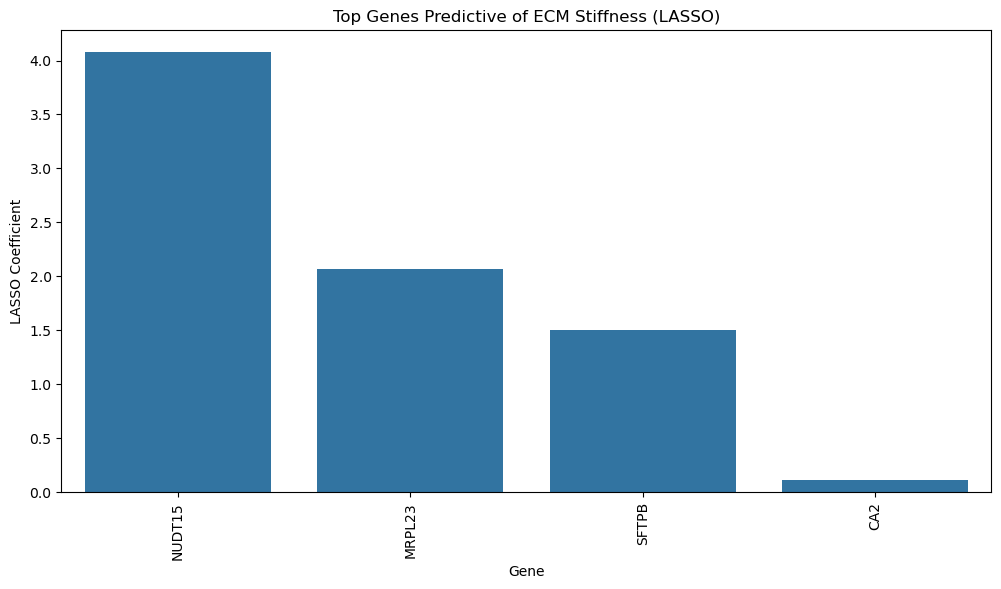

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=lasso_df["Gene"][:20], y=lasso_df["LASSO_Coefficient"][:20])
plt.xticks(rotation=90)
plt.title("Top Genes Predictive of ECM Stiffness (LASSO)")
plt.xlabel("Gene")
plt.ylabel("LASSO Coefficient")
plt.show()